In [1]:
import opendatasets as od

In [2]:
link= "https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction"

In [3]:
od.download(link)

Skipping, found downloaded files in ".\loan-status-prediction" (use force=True to force download)


In [4]:
link= "loan-status-prediction"

In [5]:
import os

In [6]:
os.listdir(link)

['.ipynb_checkpoints', 'loan_data.csv']

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
data= pd.read_csv("loan-status-prediction/loan_data.csv")

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [10]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.shape

(381, 13)

In [12]:
data.dropna(inplace=True)

In [13]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818,0.853896
std,1462.359612,2520.961308,29.382256,68.246006,0.353785
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2568.750000,0.000000,89.750000,360.000000,1.000000
50%,3329.500000,871.500000,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

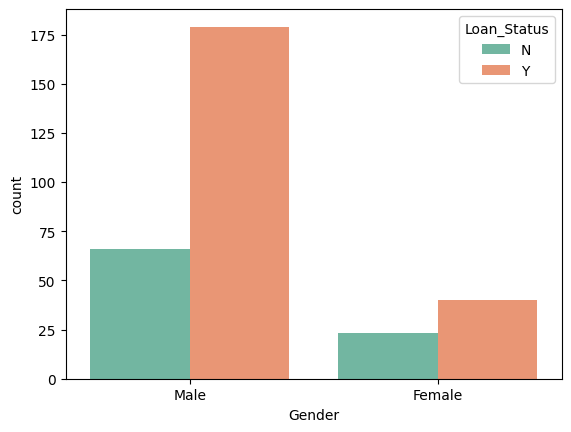

In [14]:
sns.countplot(data=data,x="Gender",hue="Loan_Status",palette="Set2")

<Axes: xlabel='Education', ylabel='count'>

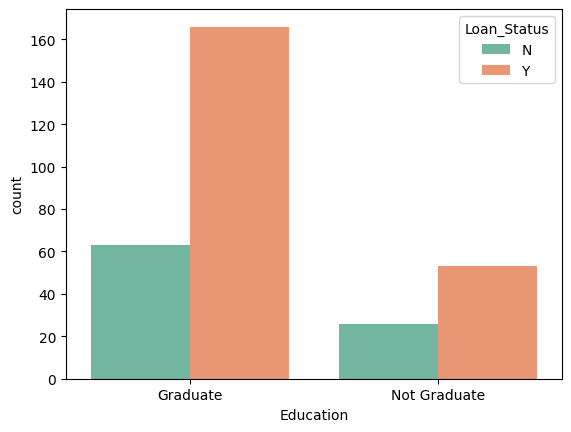

In [15]:
sns.countplot(data,x="Education",hue="Loan_Status",palette="Set2")

<Axes: xlabel='Married', ylabel='count'>

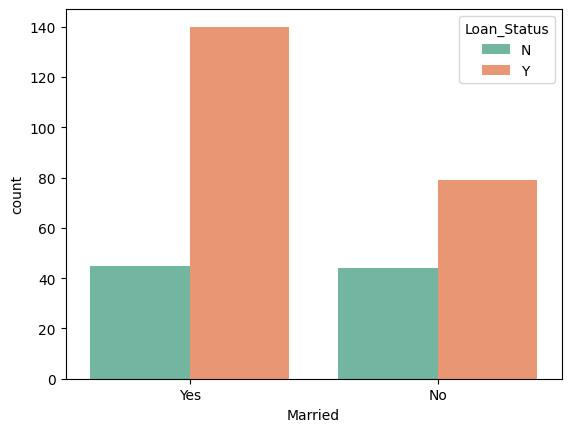

In [16]:
sns.countplot(data,x="Married",hue="Loan_Status",palette="Set2")

In [17]:
def cat_num(data, categorical):
    for i in categorical:
        encoder = LabelEncoder()
        data[i] = encoder.fit_transform(data[i])

In [30]:
categorical= ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]

In [31]:
cat_num(data,categorical)

In [32]:
data["Dependents"]= data["Dependents"].replace(to_replace="3+",value=4)

In [33]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,4,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,LP002974,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,LP002979,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [72]:
data["Property_Area"].value_counts()

Property_Area
1    123
2     99
0     86
Name: count, dtype: int64

In [34]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,0.795455,0.600649,0.256494,0.090909,3599.126623,1278.434805,104.623377,341.181818,0.853896,1.042208,0.711039
std,0.404025,0.490562,0.437408,0.287948,1462.359612,2520.961308,29.382256,68.246006,0.353785,0.775125,0.454017
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2568.750000,0.000000,89.750000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3329.500000,871.500000,110.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,4291.000000,1953.500000,128.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


In [35]:
x= data.drop(["Loan_ID","Loan_Status"],axis=1)
y= data["Loan_Status"]

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y,stratify=y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(308, 11) (246, 11) (62, 11)


In [37]:
s_v_m= svm.SVC(kernel="linear")
s_v_m.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
predict_svm_train= s_v_m.predict(x_train)
accuracy_svm_train= accuracy_score(y_train,predict_svm_train)
print("Accuracy score of svm training data is",accuracy_svm_train)

Accuracy score of svm training data is 0.8211382113821138


In [39]:
predict_svm_test=s_v_m.predict(x_test)
accuracy_svm_test= accuracy_score(y_test,predict_svm_test)
print("Accuracy score of svm testing data is",accuracy_svm_test)

Accuracy score of svm testing data is 0.8225806451612904


In [40]:
logistic= LogisticRegression(max_iter=10000)
logistic.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [45]:
predict_log_train= logistic.predict(x_train)
accuracy_log_train= accuracy_score(y_train,predict_log_train)
print("Accuracy score of logistic regression training data is",accuracy_log_train)

Accuracy score of logistic regression training data is 0.8373983739837398


In [46]:
predict_log_test=logistic.predict(x_test)
accuracy_log_test= accuracy_score(y_test,predict_log_test)
print("Accuracy score of logistic regression in testing data is",accuracy_log_test)

Accuracy score of logistic regression in testing data is 0.8387096774193549


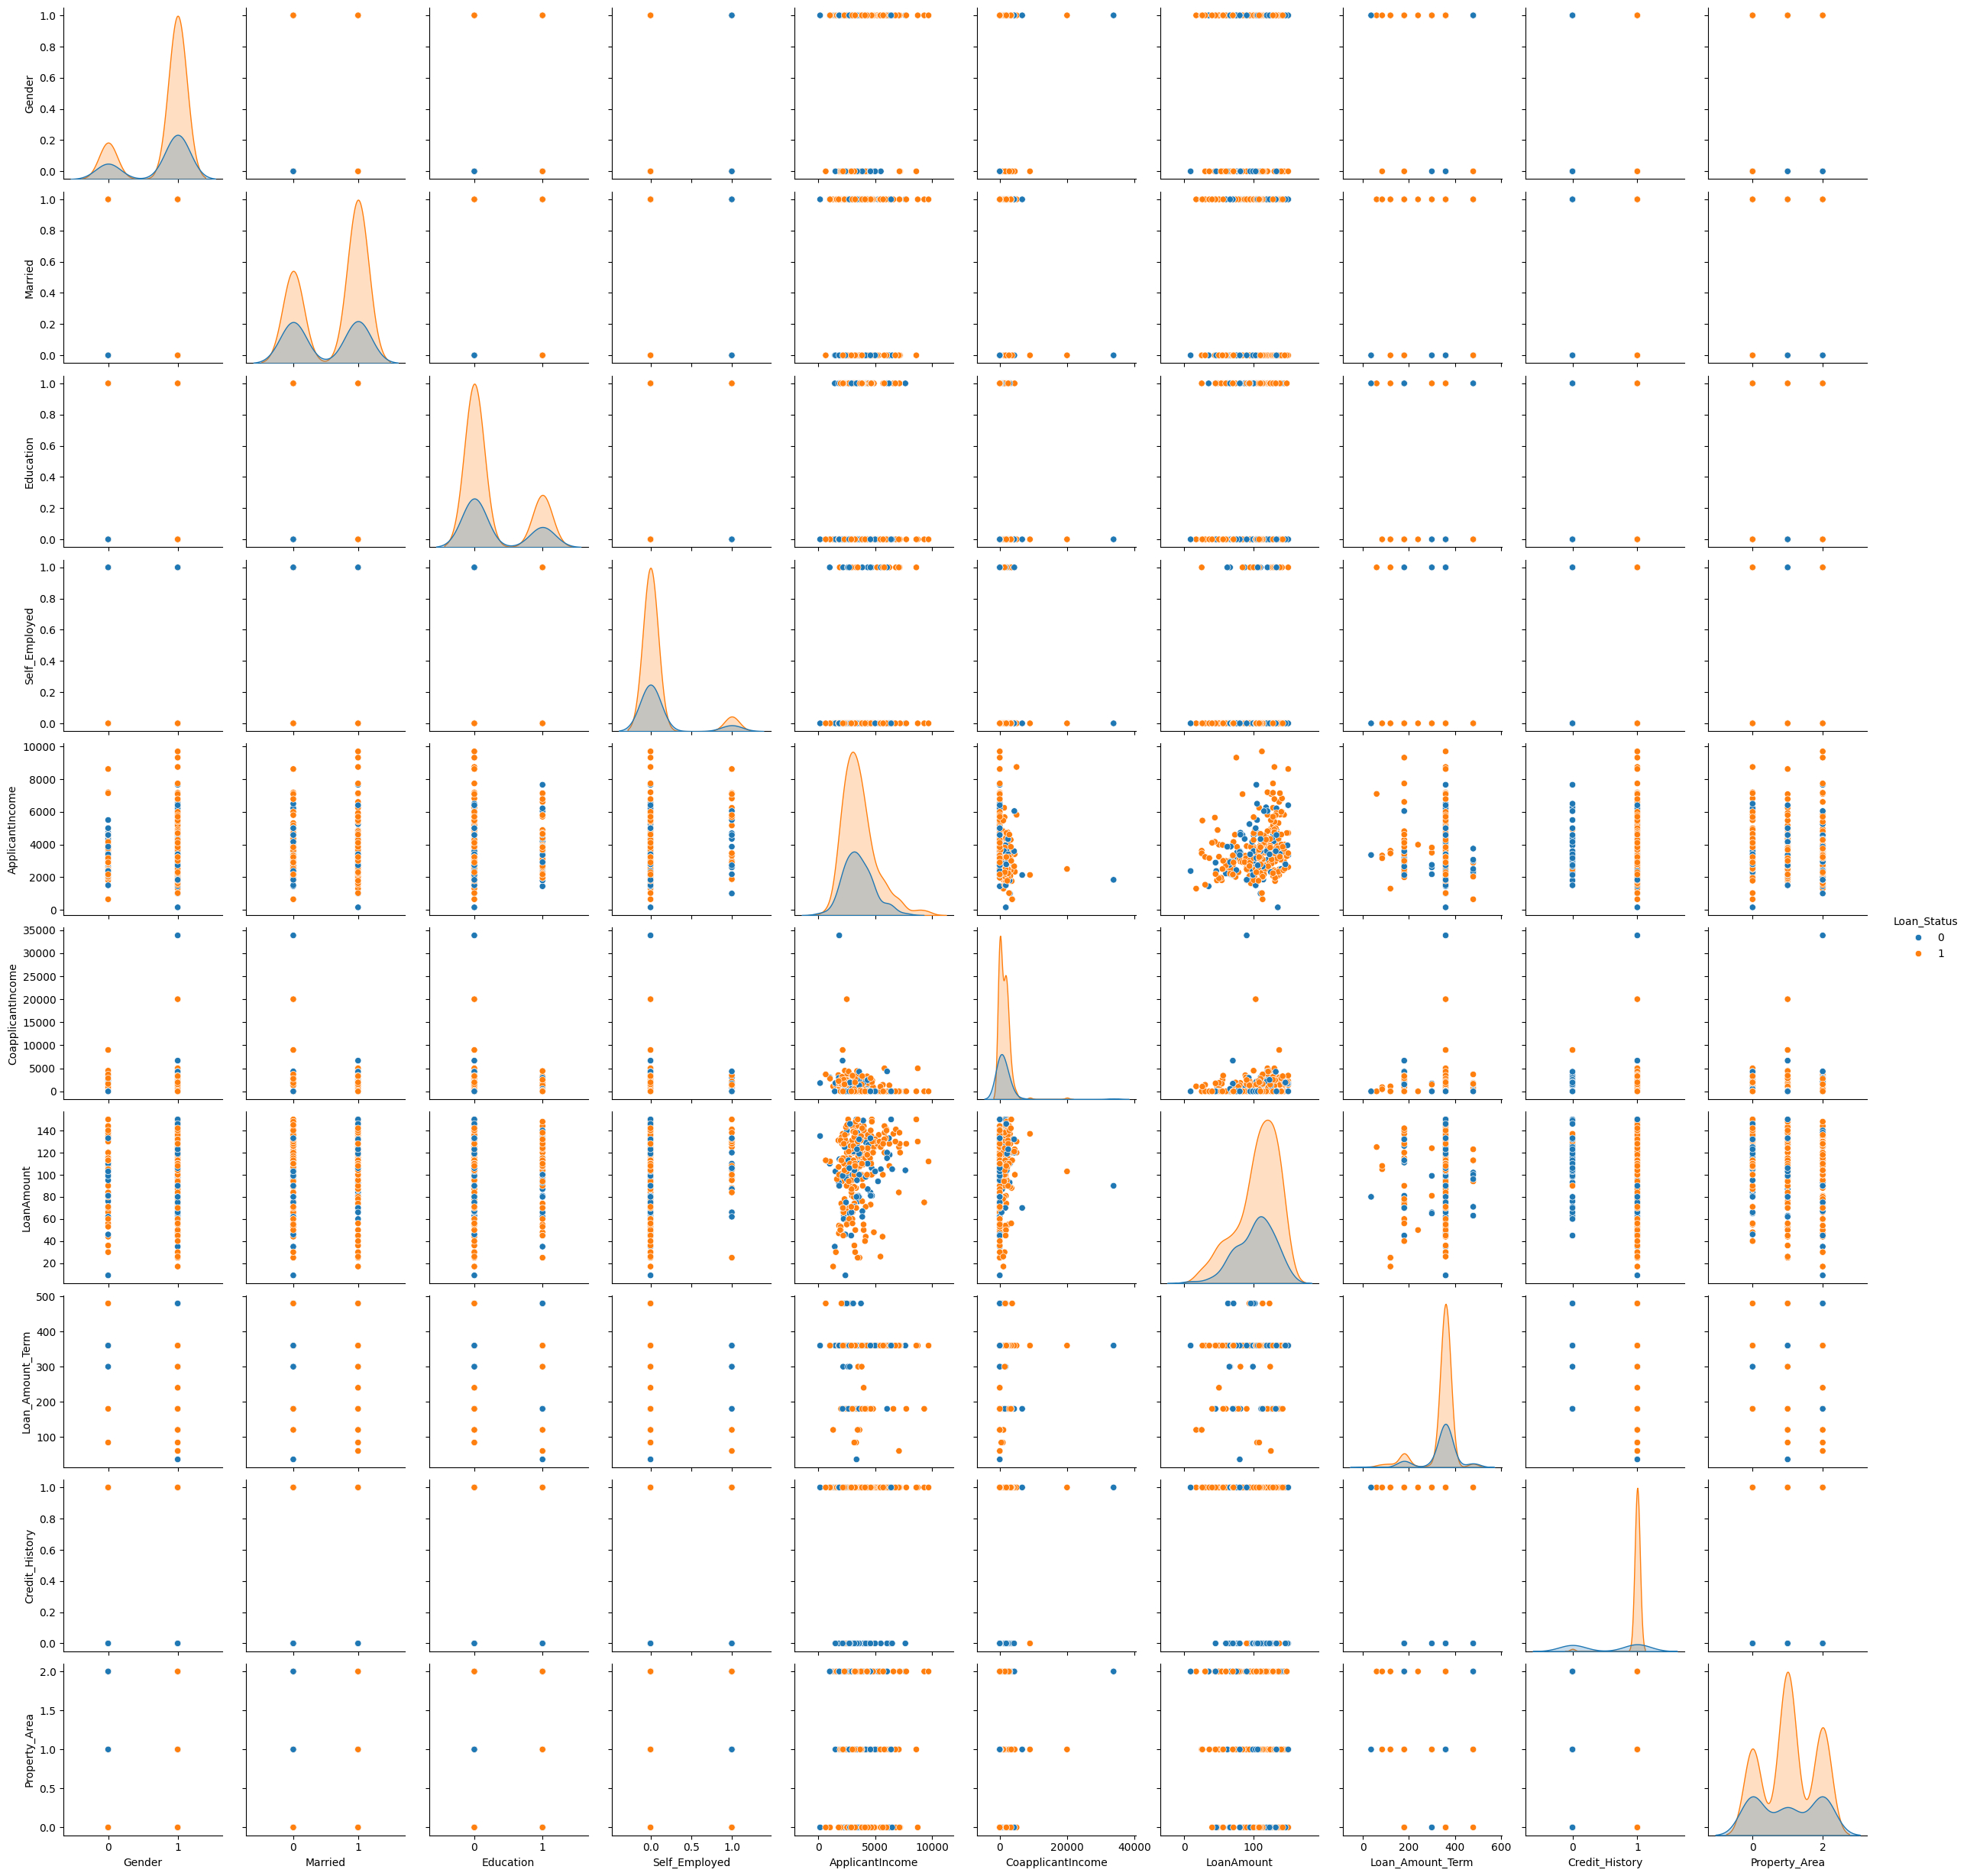

In [47]:
sns.pairplot(data, hue = 'Loan_Status')
plt.show()

In [70]:
data1= data.drop("Loan_ID",axis=1)

In [71]:
data1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.342512,0.233742,0.131954,-0.007636,0.018276,0.107629,0.107087,-0.107448,0.063704,0.038059,0.085155
Married,0.342512,1.000000,0.383522,0.023510,-0.018867,-0.042202,0.059177,0.177552,-0.152815,0.056854,0.053039,0.123695
Dependents,0.233742,0.383522,1.000000,0.107375,0.055056,0.169586,-0.074247,0.077782,-0.114322,0.023430,0.018158,0.031975
Education,0.131954,0.023510,0.107375,1.000000,0.021160,-0.040449,-0.052910,-0.041882,-0.141566,0.011413,-0.070464,-0.052029
Self_Employed,-0.007636,-0.018867,0.055056,0.021160,1.000000,0.231252,-0.065120,0.012915,-0.051897,0.002907,-0.075624,-0.047567
ApplicantIncome,0.018276,-0.042202,0.169586,-0.040449,0.231252,1.000000,-0.243677,0.267628,-0.099571,0.030307,-0.059283,0.033927
CoapplicantIncome,0.107629,0.059177,-0.074247,-0.052910,-0.065120,-0.243677,1.000000,0.123028,-0.004158,0.012715,0.030139,-0.001546
LoanAmount,0.107087,0.177552,0.077782,-0.041882,0.012915,0.267628,0.123028,1.000000,0.135069,-0.043853,-0.184085,0.053104
Loan_Amount_Term,-0.107448,-0.152815,-0.114322,-0.141566,-0.051897,-0.099571,-0.004158,0.135069,1.000000,0.015269,-0.101685,-0.009547
Credit_History,0.063704,0.056854,0.023430,0.011413,0.002907,0.030307,0.012715,-0.043853,0.015269,1.000000,0.058195,0.588029
